## Read the densities

In [5]:
import os
import numpy as np
import csv
import h5py
import matplotlib.pyplot as plt
import collections

density_dict = collections.defaultdict(dict) # initialize empty dict of dicts 
for r in [12,15,19,23]: 
    for j in os.listdir('./datasets/density50/'+str(r)): 
        den=[]
        with open('./datasets/density50/'+str(r)+'/'+str(j)) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:        
                if line_count == 0:
                    #print(f'Column names are {", ".join(row)}')
                    line_count += 1  
                    continue
                else: 
                    den= np.append(den,row)   #list of strings
                line_count += 1  
        Den=list(map(float,den))              #list of float values
        density= np.reshape(Den,(50,50,50))
        
        i = int(j.split('.csv')[0])
        density_dict[r][i] = density

(50, 50, 50)


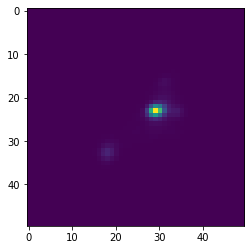

In [6]:
print(density.shape)
plt.figure()
plt.imshow(density_dict[12][0][:,:,20])

## Read the target variables

In [8]:
MR_dict = collections.defaultdict(dict) # initialize empty dict of dicts 
SR_dict = collections.defaultdict(dict)

for r in [12,15,19,23]: 
    with open('./datasets/targets/'+str(r)+'/labels.csv') as csv_file:
        csv_reader = list(csv.reader(csv_file, delimiter=','))
        MR=np.asarray(csv_reader[1])
        SR=np.asarray(csv_reader[3])
        MR=MR.astype(np.float)
        SR=SR.astype(np.float)
        for k in density_dict[r].keys():
            MR_dict[r][k] = MR[k]
            SR_dict[r][k] = SR[k]
    #             row_count= sum(1 for row_ in csv_reader)

## Save in hdf5

In [15]:
path_to_dataset = "/home/mquesnel/Courses/DeepLearning/datasets/"
filename = "merger_train_dens50.hdf5"
with h5py.File(path_to_dataset+filename, 'w') as hdf:
    print("{} created".format(path_to_dataset+filename))
    # Create groups in hdf5 file:
    dens_grp = hdf.create_group('density')
    ratio_grp = hdf.create_group('ratio')
    # MR and SR are in subgroups of the target group:
    mr_grp = ratio_grp.create_group('MR')
    sr_grp = ratio_grp.create_group('SR')
    
    # Add attributs to the hdf5 main object:
    hdf.attrs['nb_mergers'] = len(density_dict)

    i = 0
    for epoch in density_dict.keys():
        for ind in density_dict[epoch].keys():
            # Create and fill the datasets:
            mr_grp.create_dataset(str(i), data = MR_dict[epoch][ind])
            sr_grp.create_dataset(str(i), data = SR_dict[epoch][ind])

            dens_grp.create_dataset(str(i), data = density_dict[epoch][ind])
            
            i+=1

/home/mquesnel/Courses/DeepLearning/datasets/merger_train_dens50.hdf5 created


## Read hdf5

In [16]:
density_out = {}
MR_out = {}
SR_out = {}
with h5py.File(path_to_dataset+filename, 'r') as f:
    for ind in range(76):
        density_out[str(ind)] = np.array(f['density'][str(ind)])
        MR_out[str(ind)] = np.array(f['ratio']['MR'][str(ind)])
        SR_out[str(ind)] = np.array(f['ratio']['SR'][str(ind)])

0.18918921701943123
0.08262109616010802


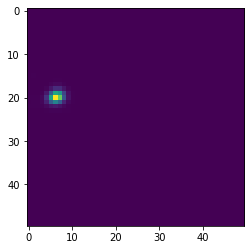

In [17]:
ind = 4
print(MR_out[str(ind)])
print(SR_out['0'])
plt.figure()
plt.imshow(density_out['0'][:,:,3])

In [58]:
a = np.array([MR[0], MR[1]])
a[1]

0.23585322117042376